In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [73]:
aqi=pd.read_csv(r'C:\Users\LENOVO\Desktop\Ajay AQI\AQI.csv')
aqi.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [74]:
aqi.shape

(1093, 9)

In [75]:
aqi.dtypes

T         float64
TM        float64
Tm        float64
SLP       float64
H         float64
VV        float64
V         float64
VM        float64
PM 2.5    float64
dtype: object

In [76]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 9 columns):
T         1093 non-null float64
TM        1093 non-null float64
Tm        1093 non-null float64
SLP       1093 non-null float64
H         1093 non-null float64
VV        1093 non-null float64
V         1093 non-null float64
VM        1093 non-null float64
PM 2.5    1092 non-null float64
dtypes: float64(9)
memory usage: 77.0 KB


In [77]:
aqi.describe()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1092.000000
mean,26.009241,32.482251,19.460201,1008.081885,62.918573,2.003111,6.751510,15.805124,109.090984
std,7.237401,6.679078,7.438653,7.529237,15.709816,0.747541,3.841137,7.308435,84.465790
min,6.700000,9.800000,0.000000,991.500000,20.000000,0.300000,0.400000,1.900000,0.000000
25%,19.300000,27.800000,12.100000,1001.100000,54.000000,1.600000,3.700000,11.100000,41.833333
50%,28.200000,34.200000,21.200000,1008.100000,64.000000,1.900000,6.500000,14.800000,83.458333
75%,31.700000,37.000000,26.000000,1015.000000,74.000000,2.600000,9.100000,18.300000,158.291667
max,38.500000,45.500000,32.700000,1023.200000,98.000000,5.800000,24.400000,57.600000,404.500000


## Check for Null Values:

In [78]:
aqi.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

### There is one null value in PM2.5, we can treat it mean.

In [79]:
aqi['PM 2.5']=aqi['PM 2.5'].fillna(aqi['PM 2.5'].mean())

In [80]:
aqi.isnull().sum()

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    0
dtype: int64

## Check for Outliers:

box plot for feature T


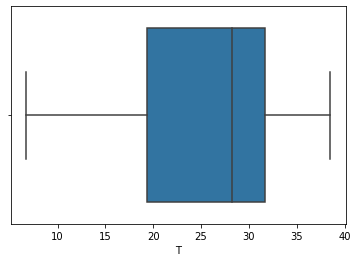

box plot for feature TM


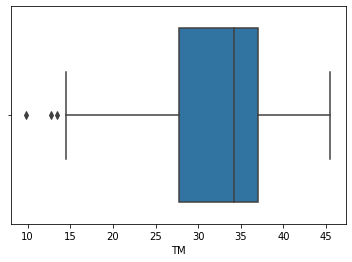

box plot for feature Tm


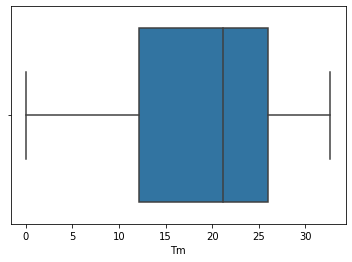

box plot for feature SLP


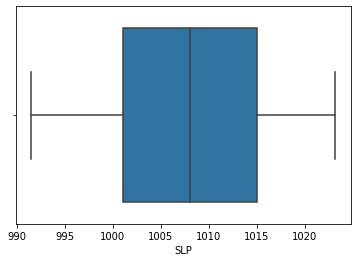

box plot for feature H


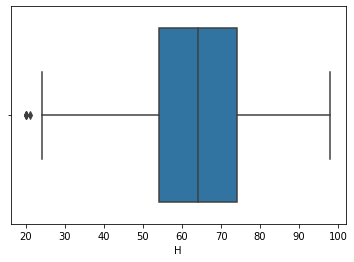

box plot for feature VV


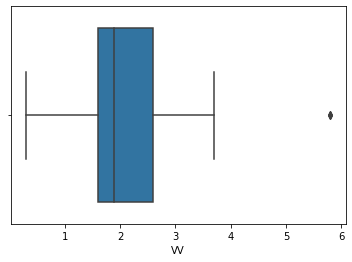

box plot for feature V


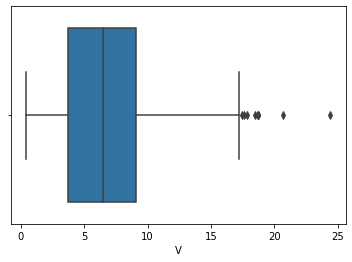

box plot for feature VM


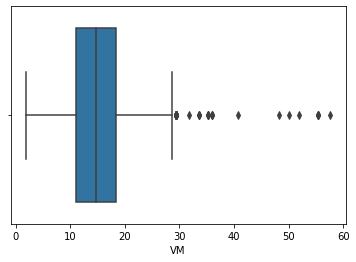

box plot for feature PM 2.5


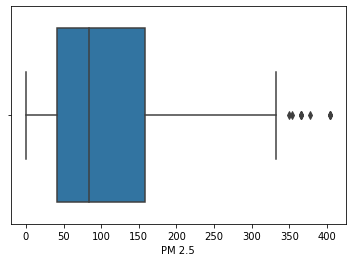

In [81]:
for i in aqi.columns:
    print('box plot for feature',i)
    sns.boxplot(aqi[i])
    plt.show()

## Check for Correlation:

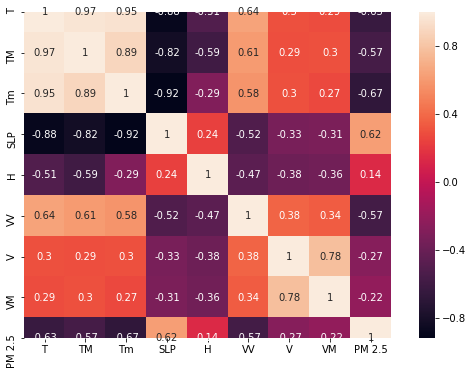

In [82]:
plt.figure(figsize=(10,6))
sns.heatmap(aqi.corr(),annot=True,square=True)

### Average Temperature is in strong correlation with minimum and maximum temperature.
### Strong negative correlation is between atmospheric pressure at sea level with max temperature and min temperature.
### There is 50% chances of increase in Particulate matter when there is rise in Atmospheric pressure at sea.
### When temperature decreases the PM rate increases.

In [83]:
aqi.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [84]:
x=aqi.drop('PM 2.5',axis=1)

In [85]:
y=aqi['PM 2.5']

In [86]:
from sklearn import preprocessing

In [87]:
std = preprocessing.StandardScaler()

In [88]:
x_scaled=std.fit_transform(x)

In [89]:
x_scaled

array([[-2.57243704, -3.39756966, -1.97171627, ..., -2.01165952,
        -0.63851719, -0.87680276],
       [-2.51714329, -2.96317926, -2.02551407, ..., -1.87782643,
        -0.61247131, -0.64408833],
       [-2.66920112, -2.8583264 , -2.29450304, ..., -1.87782643,
        -0.5082878 , -0.64408833],
       ...,
       [-1.6739135 , -1.19565969, -1.08405265, ..., -1.87782643,
         0.50750142, -0.13759221],
       [-1.34215096, -1.42034438, -1.29924383, ..., -1.20866097,
         0.16890501,  0.09512223],
       [-1.34215096, -1.36042846, -1.40683942, ..., -0.94099479,
         0.27308852,  0.34152575]])

In [90]:
xtrain, xtest , ytrain, ytest = train_test_split(x_scaled,y, test_size = 0.30, random_state = 100)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(765, 8)
(328, 8)
(765,)
(328,)


In [91]:
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')

R^2 score for train: 0.5361845554786491
R^2 score for test: 0.5216905454226586


In [92]:
ypred=lin_reg.predict(xtest)

In [93]:
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

R2 on the test:  52.17


## Accuracy for base model (SLR) is 52%

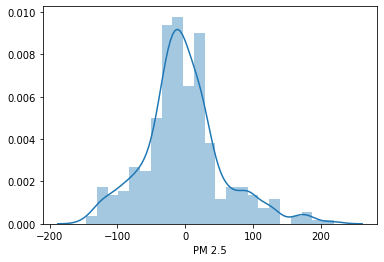

In [94]:
sns.distplot(ytest-ypred)

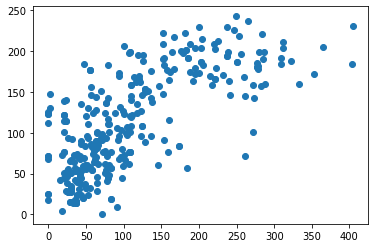

In [95]:
plt.scatter(ytest,ypred)

In [96]:
X_constant = sm.add_constant(x)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

C:\Users\LENOVO\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 PM 2.5   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     155.1
Date:                Wed, 19 Feb 2020   Prob (F-statistic):          1.06e-173
Time:                        19:12:10   Log-Likelihood:                -5981.9
No. Observations:                1093   AIC:                         1.198e+04
Df Residuals:                    1084   BIC:                         1.203e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        329.4152    651.173      0.506      0.613    -948.287    1607.118
T             -1.8105      1.961     -0.923      0.356      -5.659       2.038
TM             1.0389      1.186      0.876      0.381      -1.289       3.367
Tm            -4.9906      1.348     -3.702      0.000      -7.636      -2.346
SLP            0.0412      0.625      0.066      0.947      -1.185       1.267
H             -1.0771      0.245     -4.399      0.000      -1.558      -0.597
VV           -38.4348      3.256    -11.803      0.000     -44.825     -32.045
V             -2.0161      0.784     -2.572      0.010      -3.554      -0.478
VM             0.4414      0.386      1.142      0.254      -0.317       1.199
==============================================================================
Omnibus:                       79.285   Durbin-Watson:                   0.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.556
Skew:                           0.529   Prob(JB):                     1.64e-29
Kurtosis:                       4.339   Cond. No.                     3.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check for multicollinearity:

In [97]:
vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=x.columns).T
# if no features are correlated then the vif value will be 1

,T,TM,Tm,SLP,H,VV,V,VM
vif,65.705406,20.479998,32.791884,7.216316,4.82606,1.932733,2.956227,2.600091


### There is high multicollinearity between T,TM,Tm

In [100]:
#no of features
nof_list=np.arange(1,18)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 4
Score with 4 features: 0.468952


In [107]:
cols = list(x.columns)

model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 12)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Tm', 'H', 'VV', 'V'], dtype='object')


In [108]:
# MODELLING THE DATA
y = aqi['PM 2.5']
x = aqi[['Tm', 'H', 'VV', 'V']]
xtrain, xtest , ytrain, ytest = train_test_split(x,y, test_size = 0.30, random_state = 1)
lin_reg = LinearRegression()
model = lin_reg.fit(xtrain,ytrain)
ypred=lin_reg.predict(xtest)

print(f'R^2 score for train: {lin_reg.score(xtrain, ytrain)}')
print(f'R^2 score for test: {lin_reg.score(xtest, ytest)}')
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

R^2 score for train: 0.5304136021546453
R^2 score for test: 0.5357692302317982
R2 on the test:  53.58


### 53.5% accuracy is obtained using RFE Feature Selection Technique

In [109]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
train_score=lasso.score(xtrain,ytrain)
test_score=lasso.score(xtest,ytest)
ypred=lin_reg.predict(xtest)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

training score: 0.5300075546558684
test score:  0.5334566204549016
number of features used:  4
R2 on the test:  53.58


In [110]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(xtrain,ytrain)
train_score001=lasso001.score(xtrain,ytrain)
test_score001=lasso001.score(xtest,ytest)
coeff_used001 = np.sum(lasso001.coef_!=0)
ypred=lin_reg.predict(xtest)

print("training score for alpha=0.01:", train_score001)
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

training score for alpha=0.01: 0.5304135614186172
test score for alpha =0.01:  0.5357499880643278
number of features used: for alpha =0.01: 4
R2 on the test:  53.58


In [111]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(xtrain,ytrain)
train_score00001=lasso00001.score(xtrain,ytrain)
test_score00001=lasso00001.score(xtest,ytest)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
ypred=lin_reg.predict(xtest)

print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

training score for alpha=0.0001: 0.5304136021505828
test score for alpha =0.0001:  0.5357690376542468
number of features used: for alpha =0.0001: 4
R2 on the test:  53.58


### Using lasso regressor we get the maximum accuracy as 53.58%

In [112]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.model_selection import KFold, cross_val_score 

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dtree=DecisionTreeRegressor(criterion="mse")

In [115]:
dtree.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [116]:
train_score=dtree.score(xtrain,ytrain)
test_score=dtree.score(xtest,ytest)
ypred=dtree.predict(xtest)

print("training score:", train_score) 
print("test score: ", test_score)
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

training score: 1.0
test score:  0.7095979030064952
R2 on the test:  70.96


### Accuracy of desicion tree Regressor is almost 80%

## Desicion Tree Regressor with Cross Validation:

In [117]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,x,y,cv=5)

In [118]:
score.mean()

0.4568365593849856

## Random Forest Regressor:

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
regressor=RandomForestRegressor()

In [121]:
regressor.fit(xtrain,ytrain)

C:\Users\LENOVO\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [122]:
train_score=dtree.score(xtrain,ytrain)
test_score=dtree.score(xtest,ytest)
ypred=dtree.predict(xtest)

print("training score:", train_score) 
print("test score: ", test_score)
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

training score: 1.0
test score:  0.7095979030064952
R2 on the test:  70.96


## Random Forest Regressor with Cross Validation:

In [124]:
score=cross_val_score(regressor,x,y,cv=5)

In [125]:
score.mean()

0.7017410224451759

### Accuracy for Random Forest is alomost 71%

In [126]:
from sklearn.neighbors import KNeighborsRegressor

In [127]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

In [128]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(xtrain,ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [129]:
train_score=regressor.score(xtrain,ytrain)
test_score=regressor.score(xtest,ytest)
ypred=regressor.predict(xtest)

print("training score:", train_score) 
print("test score: ", test_score)
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

training score: 1.0
test score:  0.7589844884180242
R2 on the test:  75.9


### with KNN the accuracy is almost 76%

In [132]:
import xgboost as xgb

In [130]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x, y, test_size=0.3, random_state=0)

In [133]:
regressor=xgb.XGBRegressor()
regressor.fit(xtrain,ytrain)

C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:11:51] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [134]:
train_score=regressor.score(xtrain,ytrain)
test_score=regressor.score(xtest,ytest)
ypred=regressor.predict(xtest)

print("training score:", train_score) 
print("test score: ", test_score)
print('R2 on the test: ',round((r2_score(ytest,ypred)*100),2))

training score: 0.8313858672375608
test score:  0.7102149449835427
R2 on the test:  71.02


In [135]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,x,y,cv=5)

C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\LENOVO\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:13:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:13:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [136]:
score.mean()

0.6481818957671349

### Accuracy of xgboost regressor is 71%

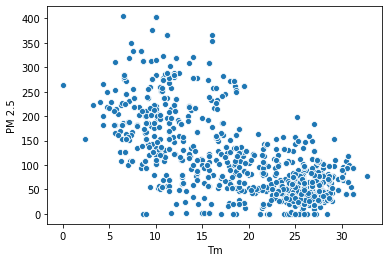

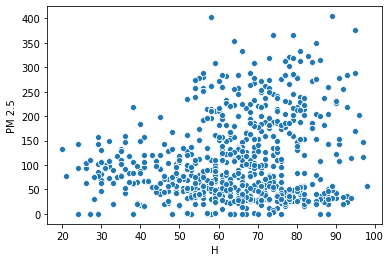

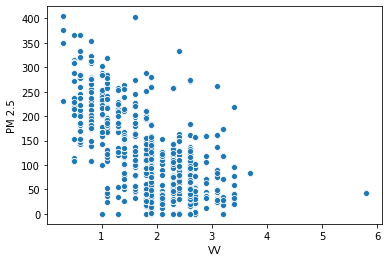

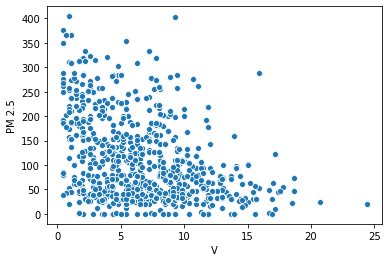

In [137]:
l=['Tm', 'H', 'VV', 'V']

for i in l:
    sns.scatterplot(aqi[i],aqi['PM 2.5'])
    plt.show()

## Interpretation:

### when there is low wind the Particulate Matter in the atmosphere is high.
### when humidity is high the Particulate Matter is almost high.
### Higher the temperature lower the Particulate Matter in the atmosphere and vice-versa.